# Import libraries

- Tensorflow: Machine Learning Library
- Matplotlib: Plotting (math) library

In [1]:
import tensorflow as tf
from matplotlib import image
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import glob

In [2]:
import warnings

#warnings.filterwarnings('ignore')

## Select Characters

Create a list of characters that we want to recognise

In [3]:
selected_characters = {
    "homer_simpson": "Homer Simpson",
    "marge_simpson": "Marge Simpson",
    "maggie_simpson": "Maggie Simpson",
    "bart_simpson": "Bart Simpson",
    "lisa_simpson": "Lisa Simpson",
    "fat_tony": "Fat Tony",
}

## Directories

In [4]:
directories = {
    "data_directory": "./data/archive/",
}

directories["annotation_file"] = directories["data_directory"] + "annotation.txt"
directories["dataset"] = directories["data_directory"] + "simpsons_dataset/"

## Preview all selected characters

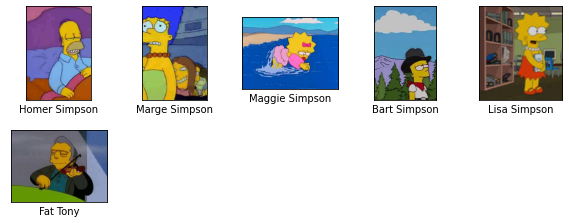

In [5]:
plt.figure(figsize=(10, 10))
i = 0
for character_name in selected_characters:
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = image.imread(directories["dataset"] + character_name + "/pic_0000.jpg")
    plt.imshow(img)
    plt.xlabel(selected_characters[character_name])
    i = i + 1
plt.show()

## Resize Images
For testing this code creates the same as above but resized to the standard_resolution variable

In [6]:
standard_resolution = 128
resampling_algorithm = Image.LANCZOS  # todo decide on resampling algorithm

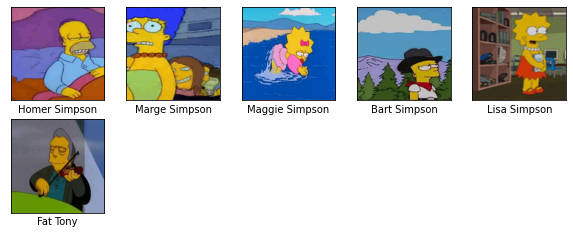

In [7]:
plt.figure(figsize=(10, 10))
i = 0
for character_name in selected_characters:
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = Image.open(directories["dataset"] + character_name + "/pic_0000.jpg")
    img = img.resize(size=(standard_resolution, standard_resolution),
                     resample=resampling_algorithm)
    img = np.asarray(img)
    plt.imshow(img)
    plt.xlabel(selected_characters[character_name])
    i = i + 1
plt.show()

## Load files and split into test data

In [8]:
test_factor = 0.2  # determine what percentage of each character's images should be used for testing

In [9]:
training_images = []  # the images as rgb values
training_labels = []  # the corresponding character name

test_images = []  # the test images as rgb values
test_labels = []  # the corresponding character name

for character_number, character_name in enumerate(selected_characters):  #loop over all selected characters

    current_character_path = directories["dataset"] + character_name + "/"
    current_character_paths_list = glob.glob(current_character_path + "*.jpg")

    # calculate how many files are test data and how many files are training data
    current_character_picture_count = len(current_character_paths_list)
    current_character_test_count = round(current_character_picture_count * test_factor)
    current_character_training_count = round(current_character_picture_count * (1 - test_factor))
    current_image_position = 0

    print("Loading Character:" + character_name,)
    print("", end='\n')

    for current_image_position, current_character_picture_path in enumerate(current_character_paths_list):  #loop over all files ending in .jpg in the current folder
        print("[",current_image_position, "/", current_character_picture_count, "]" + current_character_picture_path, end='\r')


        current_character_picture = Image.open(current_character_picture_path)  # load picture
        img = current_character_picture.resize(size=(standard_resolution, standard_resolution),
                                               resample=resampling_algorithm)  # todo decide on resampling algorithm
        img = np.asarray(img)
        im = np.array(img)  #store im as numpy array
        # shape of image is ([128x(r,g,b)], [128x(r,g,b)])

        if current_image_position <= current_character_test_count:  # if the current image is still part of the test part add to testing
            test_images.append(im)
            test_labels.append([character_number])
        else:
            training_images.append(im)
            training_labels.append([character_number])
    print("", end='\n')

training_images = np.array(training_images)
training_labels = np.array(training_labels)
test_labels = np.array(test_labels)
test_images = np.array(test_images)

Loading Character:homer_simpson

./data/archive/simpsons_dataset/homer_simpson/pic_0995.jpg[ 203 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_0163.jpg[ 269 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_2173.jpg[ 335 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_1278.jpg[ 398 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_0577.jpg[ 459 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_1079.jpg[ 524 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_0400.jpg[ 592 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_1194.jpg[ 654 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_0300.jpg[ 714 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_1632.jpg[ 773 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_2064.jpg[ 830 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_1425.jpg[ 892 / 2246 ]./data/archive/simpsons_dataset/homer_simpson/pic_2048.jpg[ 959 / 2246 ]./data/archive/simpsons_dataset

In [10]:
training_images[0].shape

(128, 128, 3)

## Create Convolutional Neuronal Network

In [11]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(standard_resolution, standard_resolution, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(selected_characters))
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [13]:
#from sklearn.preprocessing import LabelEncoder

#df[target_col] = LabelEncoder().fit_transform(df[target_col])

In [14]:
training_images, test_images = training_images / 255.0, test_images / 255.0

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    training_images, training_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

2022-02-06 19:58:51.459923: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
160/160 [==============================] - 19s 117ms/step - loss: 1.4681 - accuracy: 0.3426 - val_loss: 1.4738 - val_accuracy: 0.3507
Epoch 2/10
160/160 [==============================] - 16s 102ms/step - loss: 1.1933 - accuracy: 0.5119 - val_loss: 1.0905 - val_accuracy: 0.5651
Epoch 3/10
160/160 [==============================] - 17s 105ms/step - loss: 0.9972 - accuracy: 0.6027 - val_loss: 1.0080 - val_accuracy: 0.6056
Epoch 4/10
160/160 [==============================] - 18s 112ms/step - loss: 0.9268 - accuracy: 0.6407 - val_loss: 0.9883 - val_accuracy: 0.6298
Epoch 5/10
160/160 [==============================] - 18s 112ms/step - loss: 0.8831 - accuracy: 0.6531 - val_loss: 0.9560 - val_accuracy: 0.6298
Epoch 6/10
160/160 [==============================] - 14s 87ms/step - loss: 0.8209 - accuracy: 0.6740 - val_loss: 0.9246 - val_accuracy: 0.6477
Epoch 7/10
160/160 [==============================] - 15s 95ms/step - loss: 0.7875 - accuracy: 0.6880 - val_loss: 0.9294 - val_accu

41/41 - 1s - loss: 0.8958 - accuracy: 0.6882 - 1s/epoch - 27ms/step


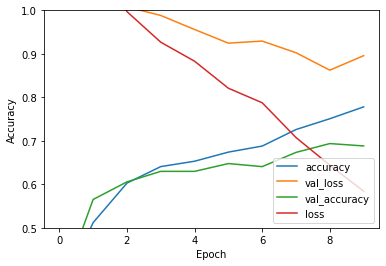

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)